In [1]:
file = open("./data/红楼梦_jieba.txt", 'r',encoding="utf-8")
text = file.read()
file.close()

file = open("./data/stop_words.txt", 'r',encoding="utf-8")
stop_words = file.read()
file.close()

file = open("./data/Dream_of_the_Red_Chamber_name.txt", 'r',encoding="utf-8")
characters = file.read()
file.close()

In [2]:
# 去除 stopwords 和 去除 单字节
import re

text_list1 = text.split(" ")
stop_words_list = stop_words.split("\n")
character_list = characters.split("\n")
final_text_list = ''

for seg in text_list1:
    if not ((seg in stop_words_list) or re.search(r"^\S$", seg)): # 不在stopwords_list, 同时不是单字节
            final_text_list += seg
            final_text_list += " "

In [3]:
file = open("./data/红楼梦_After_Stop_Word.txt", 'wt',encoding='utf-8')
file.write(final_text_list)
file.close()

In [4]:
text_list2 = final_text_list.split(" ")
import pandas as pd
import numpy

a = pd.DataFrame(text_list2, columns=['人物'])
c = a.groupby('人物')['人物'].agg({'出场次数':numpy.size}).reset_index()
d = c.sort_values('出场次数', ascending=False)

C:\AAAAAAFor ZLY\PYTHON\ANACONDA\realANACONDA\envs\deeplearning1\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


In [5]:
people1 = pd.DataFrame()
people1 = d[d['人物'].isin(character_list)]
people1['出场次数'] = people1['出场次数'].astype('uint16')

C:\AAAAAAFor ZLY\PYTHON\ANACONDA\realANACONDA\envs\deeplearning1\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
people1.head(20)

,人物,出场次数
14468,宝玉,3748
33760,袭人,1131
40565,黛玉,1029
27083,王夫人,1011
14483,宝钗,789
35314,贾琏,688
16197,平儿,588
35213,贾政,471
33252,薛姨妈,453
20289,探春,432


In [7]:
import multiprocessing
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence

in_file = './data/红楼梦_After_Stop_Word.txt'
model_file = './model/红楼梦.model'
vector_file = './model/红楼梦.vector'

model = Word2Vec(LineSentence(in_file), size=200, window=10, min_count=10, workers=multiprocessing.cpu_count())
model.save(model_file)
model.wv.save_word2vec_format(vector_file, binary=False)


In [8]:
from gensim.models import Word2Vec

def get_result(result):
  if result:
      for distance in result:
        print (distance[0], "\t", distance[1])
        
model = Word2Vec.load("./model/红楼梦.model")

In [9]:
result = model.most_similar(u"宝玉",topn=10)
get_result(result)

黛玉 	 0.9916285276412964
姐姐 	 0.9879626631736755
妹妹 	 0.9860614538192749
探春 	 0.975683331489563
林黛玉 	 0.972166895866394
宝钗 	 0.9711644649505615
不知 	 0.9689873456954956
宝钗笑 	 0.9678824543952942
阴阳 	 0.9671370983123779
翠缕 	 0.9666506052017212


C:\AAAAAAFor ZLY\PYTHON\ANACONDA\realANACONDA\envs\deeplearning1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [10]:
result = model.most_similar(positive=u"宝玉 林黛玉".split(" "), negative=u"宝钗".split(" "),topn=5)
get_result(result)

姐姐 	 0.9926697015762329
黛玉 	 0.9887619614601135
妹妹 	 0.988322913646698
不知 	 0.9744279384613037
探春 	 0.9741042852401733


C:\AAAAAAFor ZLY\PYTHON\ANACONDA\realANACONDA\envs\deeplearning1\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [11]:
file = open("./data/红楼梦_After_Stop_Word.txt",'r',encoding='utf-8')
text = file.read()
file.close()

text_list = text.split(" ")

In [12]:
file = open("./data/Dream_of_the_Red_Chamber_name.txt", 'r',encoding='utf-8')
characters = file.read()
file.close()

character_list = characters.split("\n")

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

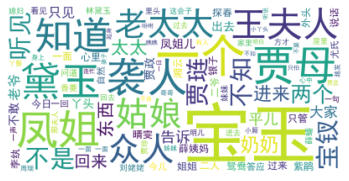

In [20]:
newtxt = ''.join(final_text_list)
wc = WordCloud(
    font_path="C:/Windows/Fonts/simhei.ttf",
    background_color="white",
    max_words=100,
    max_font_size=80
).generate(newtxt)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
wc.to_file('./人物图.png')